In [2]:
import requests
import pandas as pd

In [3]:
#Data Collection
#With the following lines of code we collect the shooting data for the game

url = "https://live.euroleague.net/api/Points?gamecode=139&seasoncode=E2021"
r = requests.get(url)
print(r.status_code)  # if all goes well this must return 200
data = r.json()
shots_df = pd.DataFrame(data['Rows'])

200


In [4]:
shots_df.head()


,NUM_ANOT,TEAM,ID_PLAYER,PLAYER,ID_ACTION,ACTION,POINTS,COORD_X,COORD_Y,ZONE,FASTBREAK,SECOND_CHANCE,POINTS_OFF_TURNOVER,MINUTE,CONSOLE,POINTS_A,POINTS_B,UTC
0,6,MAD,P007982,"WILLIAMS-GOSS, NIGEL",3FGM,Three Pointer,3,-31,759,H,0,0,0,1,09:32,0,3,20211216193052
1,7,MIL,P004331,"DELANEY, MALCOLM",3FGA,Missed Three Pointer,0,169,696,I,0,0,0,1,09:13,0,3,20211216193111
2,9,MAD,P001392,"CAUSEUR, FABIEN",2FGM,Two Pointer,2,69,81,C,1,0,0,1,09:07,0,5,20211216193118
3,12,MIL,P002812,"HINES, KYLE",2FGA,Missed Two Pointer,0,495,169,G,0,0,0,2,08:39,0,5,20211216193146
4,19,MIL,P007831,"SHIELDS, SHAVON",2FGM,Two Pointer,2,-56,225,D,0,0,1,2,08:13,2,5,20211216193257


In [5]:
#Draw a FIBA basketball court using matplotlib

from matplotlib import pyplot as plt
from matplotlib.patches import Circle, Rectangle, Arc


def draw_court(ax=None, color='black', lw=1, outer_lines=True):
    """
    FIBA basketball court dimensions:
    https://www.msfsports.com.au/basketball-court-dimensions/
    It seems like the Euroleauge API returns the shooting positions
    in resolution of 1cm x 1cm.
    """
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 45.72cm so it has a radius 45.72/2 cms
    hoop = Circle((0, 0), radius=45.72 / 2, linewidth=lw, color=color,
                  fill=False)

    # Create backboard
    backboard = Rectangle((-90, -157.5 + 120), 180, -1, linewidth=lw,
                          color=color)

    # The paint
    # Create the outer box of the paint
    outer_box = Rectangle((-490 / 2, -157.5), 490, 580, linewidth=lw,
                          color=color, fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-360 / 2, -157.5), 360, 580, linewidth=lw,
                          color=color, fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 580 - 157.5), 360, 360, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 580 - 157.5), 360, 360, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 2 * 125, 2 * 125, theta1=0, theta2=180,
                     linewidth=lw, color=color)

    # Three point line
    # Create the side 3pt lines
    corner_three_a = Rectangle((-750 + 90, -157.5), 0, 305, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((750 - 90, -157.5), 0, 305, linewidth=lw,
                               color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the
    # threes
    three_arc = Arc((0, 0), 2 * 675, 2 * 675, theta1=12, theta2=167.5,
                    linewidth=lw, color=color)

    # Center Court
    center_outer_arc = Arc((0, 1400-157.5), 2 * 180, 2 * 180, theta1=180,
                           theta2=0, linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box,
                      restricted, top_free_throw, bottom_free_throw,
                      corner_three_a, corner_three_b, three_arc,
                      center_outer_arc]
    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-750, -157.5), 1500, 1400, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

In [6]:
#The shot charts

import matplotlib.pyplot as plt
import seaborn as sns


def plot_scatter(made, miss, title=None):
    """
    Scatter plot of made and missed shots
    """
    plt.figure(figsize=(5, 4.7))
    draw_court()
    plt.plot(made['COORD_X'], made['COORD_Y'], 'o', label='Made')
    plt.plot(miss['COORD_X'], miss['COORD_Y'], 'x', markerfacecolor='none',
             label='Missed')
    plt.legend()
    plt.xlim([-800, 800])
    plt.ylim([-200, 1300])
    plt.title(title)
    plt.show()
    return


def joint_plot(df, kind='hex', title=None):
    """
    Density plot of shots as joint distributions of x and y coordinates
    """
    cmap = plt.cm.gist_heat_r
    joint_shot_chart = sns.jointplot(x=df['COORD_X'], y=df['COORD_Y'],
                                     kind='hex', space=0, color=cmap(.2),
                                     cmap=cmap, joint_kws={"gridsize": 15})

    # A joint plot has 3 Axes, the first one called ax_joint
    # is the one we want to draw our court onto
    ax = joint_shot_chart.ax_joint
    draw_court(ax)
    plt.xlim([-800, 800])
    plt.ylim([-200, 1300])
    plt.title(title)
    plt.show()
    return

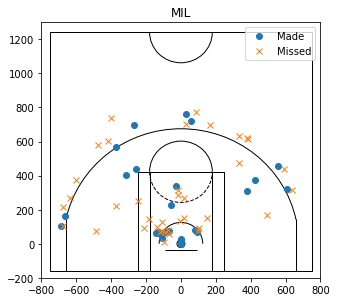

In [9]:
shots_df['TEAM'] = shots_df['TEAM'].str.strip()  # team id contains trailing white space
shots_df['ID_PLAYER'] = shots_df['ID_PLAYER'].str.strip()  # player id contains trailing white space

# split the home and away teams, their made and missed shots
home_df = shots_df[shots_df['TEAM'] == 'MIL']
fg_made_home_df = home_df[home_df['ID_ACTION'].isin(['2FGM', '3FGM'])]
fg_miss_home_df = home_df[home_df['ID_ACTION'].isin(['2FGA', '3FGA'])]

away_df = shots_df[shots_df['TEAM'] == 'MAD']
fg_made_away_df = away_df[away_df['ID_ACTION'].isin(['2FGM', '3FGM'])]
fg_miss_away_df = away_df[away_df['ID_ACTION'].isin(['2FGA', '3FGA'])]

# scatter shot chart of MILs
# plot_scatter(fg_made_home_df, fg_miss_home_df, title='MIL')

# scatter shot chart of MAD
#plot_scatter(fg_made_away_df, fg_miss_away_df, title='MAD')

# density plot of all MIL's shots (made and missed) , axis=0
#fg_home_shots = pd.concat((fg_made_home_df, fg_miss_home_df))
#joint_plot(fg_home_shots, title='MILs Attemped Shots (made and missed)')


# fg_away_shots = pd.concat((fg_made_away_df, fg_miss_away_df), axis=0)
# joint_plot(fg_away_shots, title='MADs Attemped Shots (made and missed)')


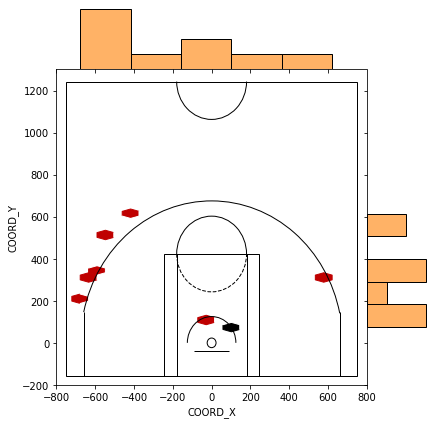

In [8]:
shots_df['TEAM'] = shots_df['TEAM'].str.strip()  # team id contains trailing white space
shots_df['ID_PLAYER'] = shots_df['ID_PLAYER'].str.strip()  # player id contains trailing white space

# split the home and away teams, their made and missed shots
Datome = shots_df[shots_df['PLAYER'] == 'CAUSEUR, FABIEN']
Datome_made = Datome[Datome['ID_ACTION'].isin(['2FGM', '3FGM'])]
len(Datome_made)
Datome_miss = Datome[Datome['ID_ACTION'].isin(['2FGA', '3FGA'])]
len(Datome_miss)
Datome_shots = pd.concat((Datome_made, Datome_miss), axis=0)
joint_plot(Datome_shots)